1.Read and extract the data from the file car_crashes.csv Download car_crashes.csv. Create a scatter plot of speeding versus alcohol with appropriate title and axis labels. (2 Points)

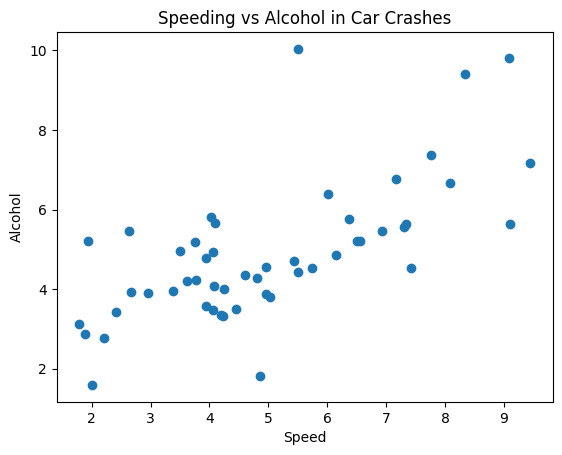

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
data= pd.read_csv('car_crashes.csv')
xvals = data['speeding']
yvals = data['alcohol']
plt.scatter(xvals, yvals)
plt.title('Speeding vs Alcohol in Car Crashes')
plt.xlabel('Speed')
plt.ylabel('Alcohol')
plt.show()

2.Read and extract the alcohol and the speeding values from the previous file. Using least-squares polynomial fit, create 5 models to predict speeding using alcohol, each with different polynomial degrees ranging between 1 and 20. Without plotting the models, identify the best model among the 5 different models and print the statistic used to identify the best-fit model.  (6 points)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def rSquared(observed, predicted):
    error = ((predicted - observed)**2).sum()
    meanError= error/len(observed)
    return 1 - (meanError/np.var(observed))

def genFits(xVals, yVals, degrees):
    models = []
    for d in degrees:
        model = np.polyfit(xVals,yVals, d)
        models.append(model)
    return models

def testFits(models, degrees, xVals,yVals):
    for i in range(len(models)):
        estYVals= np.polyval(models[i], xVals)
        error = rSquared(yVals, estYVals)
        print("Coefficient of determination:",error)
data= pd.read_csv('car_crashes.csv')
xvals = data['speeding']
yvals = data['alcohol']
print('For Model 1')
models=genFits(xvals, yvals, [2])
testFits(models,[2], xvals,yvals)

print('For Model 2')
models=genFits(xvals, yvals, [4])
testFits(models,[4], xvals,yvals)

print('For Model 3')
models=genFits(xvals, yvals, [8])
testFits(models,[8], xvals,yvals)

print('For Model 4')
models=genFits(xvals, yvals, [12])
testFits(models,[12], xvals,yvals)
print('For Model 5')
models=genFits(xvals, yvals, [16])
testFits(models,[16], xvals,yvals)

print('The model with high Coefficient of determination value will be the best fit ')

For Model 1
Coefficient of determination: 0.4629306144343691
For Model 2
Coefficient of determination: 0.47900813743144044
For Model 3
Coefficient of determination: 0.5380692421320268
For Model 4
Coefficient of determination: 0.5730958333384426
For Model 5
Coefficient of determination: 0.6720432122525766
The model with high Coefficient of determination value will be the best fit 


3.Write a Python program to generate 100 data points using data obtained from a sum of a random variable having a Gaussian distribution and a 5th-degree polynomial equation (x5+2x4+3x3+4x2+5x+6). Using least-squares polynomial fit, curve the model by increasing the polynomial degrees, until your model can accurately predict all values (0.95<r-squared<1). (6 points)

R-Squared value : 0.9859869316119048


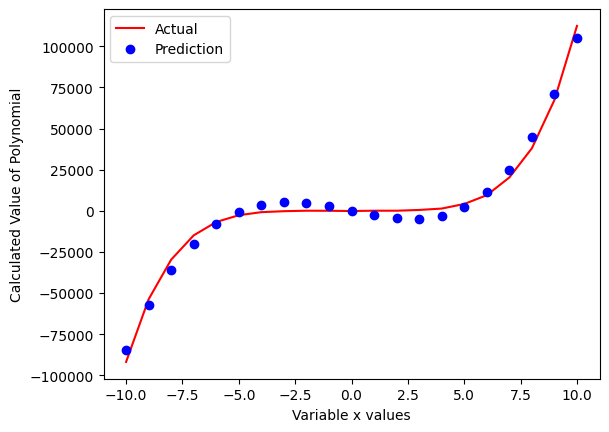

In [109]:
import random
import matplotlib.pyplot as plt
import numpy as np

def rSquared(obs, predicted):
    error = ((predicted - obs)**2).sum()
    mean = error/len(obs)
    return 1 - (mean/np.var(obs))

def generateData(a, b, c, d, e, xvals):
    for x in xvals:
        calculated_Val= x**5+a*x**4 + b*x**3 + c*x**2 + d*x + e
        yvals.append(calculated_Val+ random.gauss(0, 100))
        
xvals = np.arange(-10, 11, 1)
yvals= []
a, b, c, d, e = 1,2,3,4,5
generateData(a, b, c, d, e, xvals)
for s in range (5):
    model= np.polyfit(xvals, yvals, s)
    estYvals = np.polyval(model, xvals) 
print('R-Squared value :', rSquared(yvals, estYvals))
plt.plot(xvals, yvals, 'r', label = 'Actual') 

plt.plot(xvals, estYvals, 'bo', label = 'Prediction')
plt.xlabel('Variable x values')
plt.ylabel('Calculated Value of Polynomial')
plt.legend()
plt.show()

4.Write a Python program to read and extract data from the file drug_trial.csv Download drug_trial.csv. The blood pressure values (stored in column BP) from the two drugs are independent of each other. Perform the following using the data:- (6 points)  
i) Plot a histogram of the blood pressure values of drug A and overlay the plot with the histogram of blood pressure values of drug B.  Both the histograms should be in the same chart, overlapping each other, but with different colors (setting lower transparency is helpful). Provide an appropriate title, axis labels, and legend. 



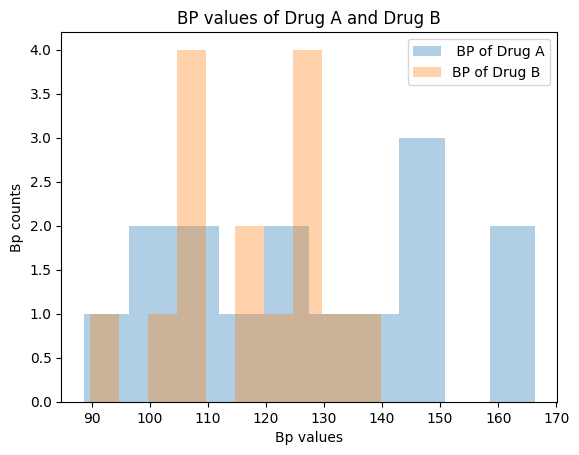

In [105]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('drug_trial.csv')
dfdruga=df[df["drug"]=='Drug_A']
dfdruga
dfdrugb=df[df["drug"]=='Drug_B']
dfdrugb
from matplotlib import pyplot
import matplotlib.pyplot as plt
pyplot.hist(dfdruga['BP'], bins=10, alpha=0.35, label=' BP of Drug A')
pyplot.hist(dfdrugb['BP'], bins=10, alpha=0.35, label='BP of Drug B')
plt.legend()
plt.title("BP values of Drug A and Drug B")
plt.xlabel("Bp values")
plt.ylabel("Bp counts")
plt.show()

ii) Perform a t-test to see if the mean of blood pressure values obtained from drug A is identical to the mean of blood pressure values obtained from drug B. State whether the means are identical or not from the output of the t-test.

In [5]:
from scipy import stats
df = pd.read_csv('drug_trial.csv')
Drug_A_mean_value= df[df['drug'] == 'Drug_A']['BP']
Drug_B_mean_value= df[df['drug'] == 'Drug_B']['BP']
stats.ttest_ind(Drug_A_mean_value,Drug_B_mean_value)

Ttest_indResult(statistic=1.5202000220826801, pvalue=0.13967380636030294)

In [6]:
print(stats.ttest_ind(Drug_A_mean_value,Drug_B_mean_value))
print('The means values of both the drugs are not identical')

Ttest_indResult(statistic=1.5202000220826801, pvalue=0.13967380636030294)
The means values of both the drugs are not identical
